# Import libraries

In [1]:
import numpy as np
import pandas as pd

# Load data
We create a function that reads in the dataset.

In [2]:
def loadData(filename):
    
    data = pd.read_csv(filename)

    return data

In [3]:
applications = loadData("../Dataset/application.csv")
credits = loadData("../Dataset/scores.csv")

# Cleaning data
Change column names and remove unnecessary attributes.

In [4]:
applications = applications.rename(columns={
    'Unnamed: 0': 'entry',
    'mobile': 'own_mobile',
    'work_phone': 'own_work_phone',
    'phone': 'own_phone',
    'email': 'has_email',
    'CNT_FAM_MEMBERS': 'family_size'
})

applications = applications.drop(columns=['entry'])
for attribute in applications.columns:
    if attribute != "id":
        print(f"Attribute: {attribute}")
        print(applications[attribute].value_counts(normalize=True) * 100)

Attribute: gender
F    67.138365
M    32.861635
Name: gender, dtype: float64
Attribute: own_car
N    62.810307
Y    37.189693
Name: own_car, dtype: float64
Attribute: own_realty
Y    69.335115
N    30.664885
Name: own_realty, dtype: float64
Attribute: num_child
0     69.334431
1     20.185974
2      9.094371
3      1.238151
4      0.110818
5      0.030327
7      0.002052
9      0.001140
12     0.000912
6      0.000912
14     0.000684
19     0.000228
Name: num_child, dtype: float64
Attribute: income
135000.0    10.689374
157500.0     9.067920
180000.0     8.644714
112500.0     8.431971
225000.0     7.782341
              ...    
151425.0     0.000228
133461.0     0.000228
265950.0     0.000228
201150.0     0.000228
36679.5      0.000228
Name: income, Length: 866, dtype: float64
Attribute: income_type
Working                 51.556354
Commercial associate    22.974665
Pensioner               17.213954
State servant            8.251151
Student                  0.003876
Name: income_type, 

We remove the attribute `own_mobile` since there is no variability in the data.

In [5]:
applications = applications.drop(columns=['own_mobile'])

We adjust the employment length for all positive values to 0.

In [6]:
applications.loc[applications['employment_length'] >= 0, 'employment_length'] = 0

We convert all Y/N data to 1/0

In [7]:
applications.loc[applications['own_car'] == "Y", 'own_car'] = 1
applications.loc[applications['own_car'] == "N", 'own_car'] = 0

applications.loc[applications['own_realty'] == "Y", 'own_realty'] = 1
applications.loc[applications['own_realty'] == "N", 'own_realty'] = 0

# One Hot Encoding
We are going to OHE all non-numerical data.

These are the attributes to encode:
* gender
* income_type
* education_level
* family_status
* house_type
* job

### GENDER

In [8]:
gender_dummy = pd.get_dummies(applications['gender'])
gender_dummy = gender_dummy.drop(['M'], axis=1)
gender_dummy = gender_dummy.rename(columns={'F': 'is_female'})

### INCOME TYPE

In [9]:
income_type_dummy = pd.get_dummies(applications['income_type'])
income_type_dummy = income_type_dummy.drop(['Student'], axis=1)
income_type_dummy = income_type_dummy.rename(columns={
    'Commercial associate': 'is_com_assoc',
    'Pensioner': 'is_pensioner',
    'State servant': 'is_state_servant',
    'Working': 'is_working'
})

### EDUCATION LEVEL

In [10]:
education_level_dummy = pd.get_dummies(applications['education_level'])
education_level_dummy = education_level_dummy.drop(['Secondary / secondary special'], axis=1)
education_level_dummy = education_level_dummy.rename(columns={
    'Academic degree': 'has_academic_degree',
    'Higher education': 'has_higher_education',
    'Incomplete higher': 'has_incomplete_higher_education',
    'Lower secondary': 'has_lower_secondary_education'
})

### FAMILY STATUS

In [11]:
family_status_dummy = pd.get_dummies(applications['family_status'])
family_status_dummy = family_status_dummy.drop(['Civil marriage'], axis=1)
family_status_dummy = family_status_dummy.rename(columns={
    'Married': 'is_married',
    'Separated': 'is_separated',
    'Single / not married': 'is_single',
    'Widow': 'is_widowed'
})

### HOUSE TYPE

In [12]:
house_type_dummy = pd.get_dummies(applications['house_type'])
house_type_dummy = house_type_dummy.drop(['With parents'], axis=1)
house_type_dummy = house_type_dummy.rename(columns={
    'Co-op apartment': 'lives_in_co-op',
    'House / apartment': 'lives_in_house',
    'Municipal apartment': 'lives_in_municipal',
    'Office apartment': 'lives_in_office',
    'Rented apartment': 'lives_in_rented'
})

### JOB

For job, as there are a lot of types, we decide to categorise them to these types:
* Labor_Work: Laborers, Low-skill Laborers
* Office_Work: Accountants, Secretaries, HR staff, Realty agents, High skill tech staff, IT staff
* Healthcare_Work: Medicine staff
* Tech_Work: High skill tech staff, IT staff
* On-site_Work: Managers, Core staff, Drivers, Security staff, Cleaning staff
* Service_Work: Sales staff, Waiters/barmen staff, Cooking staff, Cleaning staff, Drivers, Medicine staff
* Private_Service_Work: Private service staff 

In [13]:
job_dummy = pd.get_dummies(applications['job'])
job_dummy_new = pd.DataFrame()

job_dummy_new["Labor_Work"] = job_dummy['Laborers'] + job_dummy['Low-skill Laborers']
job_dummy_new["Office_Work"] = job_dummy['Accountants'] + job_dummy['Secretaries'] + job_dummy['HR staff'] + job_dummy['Realty agents'] + job_dummy['High skill tech staff'] + job_dummy['IT staff']
job_dummy_new["Healthcare_Work"] = job_dummy['Medicine staff']
job_dummy_new["Tech_Work"] = job_dummy['High skill tech staff'] + job_dummy['IT staff']
job_dummy_new["On-site_Work"] = job_dummy['Managers'] + job_dummy['Core staff'] + job_dummy['Drivers'] + job_dummy['Security staff'] + job_dummy['Cleaning staff']
job_dummy_new["Service_Work"] = job_dummy['Sales staff'] + job_dummy['Waiters/barmen staff'] + job_dummy['Cooking staff'] + job_dummy['Cleaning staff'] + job_dummy['Drivers'] + job_dummy['Medicine staff']


In [14]:
to_OHE = [
    'gender',
    'income_type',
    'education_level',
    'family_status',
    'house_type',
    'job'
]
applications = applications.drop(to_OHE, axis=1)
encoded_applications = pd.concat([
    applications, 
    gender_dummy, 
    income_type_dummy, 
    education_level_dummy, 
    family_status_dummy, 
    house_type_dummy, 
    job_dummy_new
], axis=1)

In [15]:
encoded_applications

,id,own_car,own_realty,num_child,income,birth_day,employment_length,own_work_phone,own_phone,has_email,...,lives_in_house,lives_in_municipal,lives_in_office,lives_in_rented,Labor_Work,Office_Work,Healthcare_Work,Tech_Work,On-site_Work,Service_Work
0,5008804,1,1,0,427500.0,-12005,-4542,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,5008805,1,1,0,427500.0,-12005,-4542,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,5008806,1,1,0,112500.0,-21474,-1134,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,5008808,0,1,0,270000.0,-19110,-3051,0,1,1,...,1,0,0,0,0,0,0,0,0,1
4,5008809,0,1,0,270000.0,-19110,-3051,0,1,1,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,0,1,0,135000.0,-22717,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
438553,6840222,0,0,0,103500.0,-15939,-3007,0,0,0,...,1,0,0,0,1,0,0,0,0,0
438554,6841878,0,0,0,54000.0,-8169,-372,1,0,0,...,0,0,0,0,0,0,0,0,0,1
438555,6842765,0,1,0,72000.0,-21673,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


# Feature scaling

We will normalise our value attributes.

Even though standardisation is a more logical fit, due to the large number of OHE, we will try normalising first.

In [16]:
to_scale = [
    "num_child",
    "income",
    "birth_day",
    "employment_length"
]

for attribute in to_scale:
    max_value = encoded_applications[attribute].max()
    min_value = encoded_applications[attribute].min()
    encoded_applications[attribute] = (encoded_applications[attribute] - min_value) / (max_value - min_value)

In [17]:
len(encoded_applications.columns)

35

# Adjust Data
We will adjust the data to train.

In [18]:
updated_applicants = pd.merge(encoded_applications, credits, on='id', how='left')
updated_applicants = updated_applicants.drop(['id'], axis=1)

In [19]:
applicants_w_records = updated_applicants.dropna(subset = ["total_score"])
applicants_no_records = updated_applicants.loc[updated_applicants["total_score"].isna()]


We split away around 20% of the applicants with records as test data.

In [20]:
removal_index_labeled = range(0, len(applicants_w_records), 5)
test_data = applicants_w_records.reset_index().filter(removal_index_labeled, axis=0)
train_data = applicants_w_records.reset_index().drop(removal_index_labeled, axis=0)

In [21]:
x_test_data = test_data.drop(['credit_history_score', 'duration_score', 'total_score'], axis=1).to_numpy(dtype=float)
y_test_data = test_data['total_score'].to_numpy(dtype=float)
x_train_data = train_data.drop(['credit_history_score', 'duration_score', 'total_score'], axis=1).to_numpy(dtype=float)
y_train_data = train_data['total_score'].to_numpy(dtype=float)

We split the unlabelled data into 3 sets.

In [22]:
removal_index_unlabelled1 = range(0, len(applicants_no_records), 3)
removal_index_unlabelled2 = range(1, len(applicants_no_records), 3)
removal_index_unlabelled3 = range(2, len(applicants_no_records), 3)
unlabelled_data_1 = applicants_no_records.reset_index().filter(removal_index_unlabelled1, axis=0)
unlabelled_data_2 = applicants_no_records.reset_index().filter(removal_index_unlabelled2, axis=0)
unlabelled_data_3 = applicants_no_records.reset_index().filter(removal_index_unlabelled3, axis=0)

x_unlabelled_data_1 = unlabelled_data_1.drop(['credit_history_score', 'duration_score', 'total_score'], axis=1).to_numpy(dtype=float)
x_unlabelled_data_2 = unlabelled_data_2.drop(['credit_history_score', 'duration_score', 'total_score'], axis=1).to_numpy(dtype=float)
x_unlabelled_data_3 = unlabelled_data_3.drop(['credit_history_score', 'duration_score', 'total_score'], axis=1).to_numpy(dtype=float)

We remove first column as they are indexes.

In [23]:
x_test_data = np.delete(x_test_data, 0, axis=1)
x_train_data = np.delete(x_train_data, 0, axis=1)
x_unlabelled_data_1 = np.delete(x_unlabelled_data_1, 0, axis=1)
x_unlabelled_data_2 = np.delete(x_unlabelled_data_2, 0, axis=1)
x_unlabelled_data_3 = np.delete(x_unlabelled_data_3, 0, axis=1)

# Semi-supervised Learning
We will now use the learning model and implement NN.

Datasets:
* x_test_data
* y_test_data
* x_train_data
* y_train_data
* x_unlabelled_data_1
* x_unlabelled_data_2
* x_unlabelled_data_3

As starters, we will set the median as base score for good clients.

In [24]:
y_test_data = (y_test_data > credits['total_score'].median()).astype(int)
y_train_data = (y_train_data > credits['total_score'].median()).astype(int)

## Neural Network
We first create our NN model.

In [25]:
import keras
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers

In [26]:
model_one = Sequential([
    Dense(units=256, input_dim=x_train_data.shape[1], activation='sigmoid'),
    Dropout(0.1),
    Dense(units=256, activation='relu'),
    Dropout(0.1),
    Dense(units=1, activation='sigmoid')
])

model_one.summary()

model_one.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               8960      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 75,009
Trainable params: 75,009
Non-trainable params: 0
_________________________________________________________________


We train our first set of labelled data

In [27]:
first_training = model_one.fit(x_train_data, y_train_data, batch_size=16, epochs=256, validation_data=(x_test_data, y_test_data))

Epoch 1/256
1823/1823 [==============================] - 7s 3ms/step - loss: 0.6956 - accuracy: 0.5226 - val_loss: 0.6906 - val_accuracy: 0.5326
Epoch 2/256
1823/1823 [==============================] - 8s 4ms/step - loss: 0.6905 - accuracy: 0.5305 - val_loss: 0.6960 - val_accuracy: 0.5293
Epoch 3/256
1823/1823 [==============================] - 11s 6ms/step - loss: 0.6895 - accuracy: 0.5319 - val_loss: 0.6879 - val_accuracy: 0.5293
Epoch 4/256
1823/1823 [==============================] - 11s 6ms/step - loss: 0.6890 - accuracy: 0.5341 - val_loss: 0.6904 - val_accuracy: 0.5315
Epoch 5/256
1823/1823 [==============================] - 11s 6ms/step - loss: 0.6880 - accuracy: 0.5373 - val_loss: 0.6874 - val_accuracy: 0.5326
Epoch 6/256
1823/1823 [==============================] - 11s 6ms/step - loss: 0.6878 - accuracy: 0.5398 - val_loss: 0.6867 - val_accuracy: 0.5461
Epoch 7/256
1823/1823 [==============================] - 11s 6ms/step - loss: 0.6876 - accuracy: 0.5391 - val_loss: 0.6862 - v

We create our first pesudo-labels. There will be a conversion of 1/0s as model output uses sigmoid.

The pseudo-labels and its applicant data are then added to the training data.

In [28]:
pseudo_label_1 = model_one.predict(x_unlabelled_data_1)
indexing = np.where((pseudo_label_1 > 0.95) | (pseudo_label_1 < 0.05))
pseudo_label_1 = pseudo_label_1[(pseudo_label_1 > 0.95) | (pseudo_label_1 < 0.05)]
pseudo_label_1 = (pseudo_label_1 > 0.5).astype(int)
good_unlabelled_data_1 = x_unlabelled_data_1[indexing[0]]

new_x_train_data = np.vstack((x_train_data, good_unlabelled_data_1))
new_y_train_data = np.append(y_train_data, pseudo_label_1)

4189/4189 [==============================] - 3s 730us/step


### Second training

In [29]:
model_two = Sequential([
    Dense(units=256, input_dim=x_train_data.shape[1], activation='sigmoid'),
    Dropout(0.1),
    Dense(units=256, activation='relu'),
    Dropout(0.1),
    Dense(units=1, activation='sigmoid')
])

model_two.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

second_training = model_two.fit(new_x_train_data, new_y_train_data, batch_size=8, epochs=128, validation_data=(x_test_data, y_test_data))

Epoch 1/128
4392/4392 [==============================] - 7s 1ms/step - loss: 0.6850 - accuracy: 0.5574 - val_loss: 0.6902 - val_accuracy: 0.5328
Epoch 2/128
4392/4392 [==============================] - 6s 1ms/step - loss: 0.6743 - accuracy: 0.5670 - val_loss: 0.6901 - val_accuracy: 0.5232
Epoch 3/128
4392/4392 [==============================] - 6s 1ms/step - loss: 0.6701 - accuracy: 0.5707 - val_loss: 0.6883 - val_accuracy: 0.5400
Epoch 4/128
4392/4392 [==============================] - 6s 1ms/step - loss: 0.6648 - accuracy: 0.5820 - val_loss: 0.6958 - val_accuracy: 0.5310
Epoch 5/128
4392/4392 [==============================] - 6s 1ms/step - loss: 0.6611 - accuracy: 0.5833 - val_loss: 0.6900 - val_accuracy: 0.5303
Epoch 6/128
4392/4392 [==============================] - 6s 1ms/step - loss: 0.6572 - accuracy: 0.5862 - val_loss: 0.6915 - val_accuracy: 0.5303
Epoch 7/128
4392/4392 [==============================] - 6s 1ms/step - loss: 0.6551 - accuracy: 0.5871 - val_loss: 0.6891 - val_ac

Second pseudo-labelling and adjustment to training data.

In [30]:
pseudo_label_2 = model_one.predict(x_unlabelled_data_2)
indexing = np.where((pseudo_label_2 > 0.95) | (pseudo_label_2 < 0.05))
pseudo_label_2 = pseudo_label_2[(pseudo_label_2 > 0.95) | (pseudo_label_2 < 0.05)]
pseudo_label_2 = (pseudo_label_2 > 0.5).astype(int)
good_unlabelled_data_2 = x_unlabelled_data_2[indexing[0]]

new_x_train_data = np.vstack((new_x_train_data, good_unlabelled_data_2))
new_y_train_data = np.append(new_y_train_data, pseudo_label_2)

4189/4189 [==============================] - 3s 730us/step


### Third training

In [31]:
model_three = Sequential([
    Dense(units=256, input_dim=x_train_data.shape[1], activation='sigmoid'),
    Dropout(0.1),
    Dense(units=256, activation='relu'),
    Dropout(0.1),
    Dense(units=1, activation='sigmoid')
])

model_three.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

third_training = model_three.fit(new_x_train_data, new_y_train_data, batch_size=8, epochs=128, validation_data=(x_test_data, y_test_data))

Epoch 1/128
5132/5132 [==============================] - 7s 1ms/step - loss: 0.6690 - accuracy: 0.5871 - val_loss: 0.7017 - val_accuracy: 0.5399
Epoch 2/128
5132/5132 [==============================] - 7s 1ms/step - loss: 0.6483 - accuracy: 0.6066 - val_loss: 0.6952 - val_accuracy: 0.5278
Epoch 3/128
5132/5132 [==============================] - 7s 1ms/step - loss: 0.6361 - accuracy: 0.6168 - val_loss: 0.7122 - val_accuracy: 0.5287
Epoch 4/128
5132/5132 [==============================] - 7s 1ms/step - loss: 0.6306 - accuracy: 0.6185 - val_loss: 0.6970 - val_accuracy: 0.5291
Epoch 5/128
5132/5132 [==============================] - 7s 1ms/step - loss: 0.6237 - accuracy: 0.6246 - val_loss: 0.7460 - val_accuracy: 0.5296
Epoch 6/128
5132/5132 [==============================] - 7s 1ms/step - loss: 0.6163 - accuracy: 0.6272 - val_loss: 0.7129 - val_accuracy: 0.5303
Epoch 7/128
5132/5132 [==============================] - 7s 1ms/step - loss: 0.6066 - accuracy: 0.6342 - val_loss: 0.7001 - val_ac

Third pseudo-labelling and adjustment to training data.

In [32]:
pseudo_label_3 = model_one.predict(x_unlabelled_data_3)
indexing = np.where((pseudo_label_3 > 0.95) | (pseudo_label_3 < 0.05))
pseudo_label_3 = pseudo_label_3[(pseudo_label_3 > 0.95) | (pseudo_label_3 < 0.05)]
pseudo_label_3 = (pseudo_label_3 > 0.5).astype(int)
good_unlabelled_data_3 = x_unlabelled_data_3[indexing[0]]

new_x_train_data = np.vstack((new_x_train_data, good_unlabelled_data_3))
new_y_train_data = np.append(new_y_train_data, pseudo_label_3)

4189/4189 [==============================] - 3s 774us/step


### Fourth training

In [33]:
model_four = Sequential([
    Dense(units=256, input_dim=x_train_data.shape[1], activation='sigmoid'),
    Dropout(0.1),
    Dense(units=256, activation='relu'),
    Dropout(0.1),
    Dense(units=1, activation='sigmoid')
])

model_four.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

fourth_training = model_four.fit(new_x_train_data, new_y_train_data, batch_size=8, epochs=64, validation_data=(x_test_data, y_test_data))

Epoch 1/64
5881/5881 [==============================] - 8s 1ms/step - loss: 0.6484 - accuracy: 0.6165 - val_loss: 0.7266 - val_accuracy: 0.5322
Epoch 2/64
5881/5881 [==============================] - 8s 1ms/step - loss: 0.6189 - accuracy: 0.6412 - val_loss: 0.7121 - val_accuracy: 0.5300
Epoch 3/64
5881/5881 [==============================] - 8s 1ms/step - loss: 0.6090 - accuracy: 0.6440 - val_loss: 0.7208 - val_accuracy: 0.5311
Epoch 4/64
5881/5881 [==============================] - 8s 1ms/step - loss: 0.5984 - accuracy: 0.6508 - val_loss: 0.7235 - val_accuracy: 0.5295
Epoch 5/64
5881/5881 [==============================] - 8s 1ms/step - loss: 0.5850 - accuracy: 0.6605 - val_loss: 0.7076 - val_accuracy: 0.5328
Epoch 6/64
5881/5881 [==============================] - 8s 1ms/step - loss: 0.5691 - accuracy: 0.6759 - val_loss: 0.7203 - val_accuracy: 0.5366
Epoch 7/64
5881/5881 [==============================] - 8s 1ms/step - loss: 0.5572 - accuracy: 0.6852 - val_loss: 0.7229 - val_accuracy:

### Testing accuracy
We will now test the accuracy of our model.

In [34]:
from sklearn.metrics import classification_report


test_accuracy = model_four.predict(x_test_data)
test_accuracy = (test_accuracy > 0.5).astype(int)
print(classification_report(y_test_data, test_accuracy))

228/228 [==============================] - 0s 697us/step
              precision    recall  f1-score   support

           0       0.59      0.76      0.67      3860
           1       0.61      0.41      0.49      3432

    accuracy                           0.60      7292
   macro avg       0.60      0.59      0.58      7292
weighted avg       0.60      0.60      0.59      7292



# Overfitting?

First training

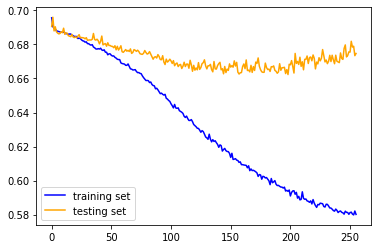

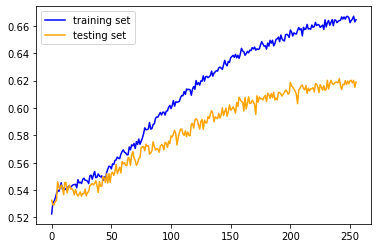

In [35]:
import matplotlib.pyplot as plt

plt.plot(range(256), first_training.history["loss"], label="training set", color = "blue")
plt.plot(range(256), first_training.history["val_loss"], label="testing set", color = "orange")
plt.legend()
plt.show()

plt.plot(range(256), first_training.history["accuracy"],  label="training set", color = "blue")
plt.plot(range(256), first_training.history["val_accuracy"],  label="testing set", color = "orange")
plt.legend()
plt.show()

Second training

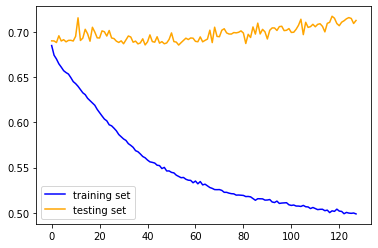

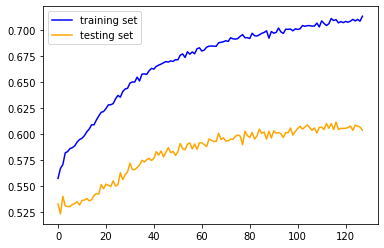

In [36]:
plt.plot(range(128), second_training.history["loss"], label="training set", color = "blue")
plt.plot(range(128), second_training.history["val_loss"], label="testing set", color = "orange")
plt.legend()
plt.show()

plt.plot(range(128), second_training.history["accuracy"],  label="training set", color = "blue")
plt.plot(range(128), second_training.history["val_accuracy"],  label="testing set", color = "orange")
plt.legend()
plt.show()

Third training

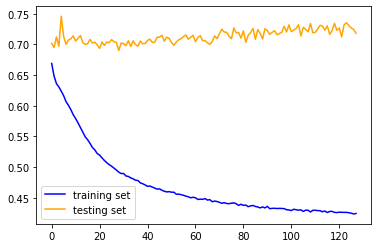

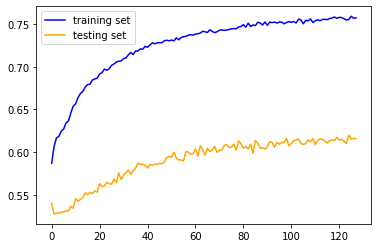

In [37]:
plt.plot(range(128), third_training.history["loss"], label="training set", color = "blue")
plt.plot(range(128), third_training.history["val_loss"], label="testing set", color = "orange")
plt.legend()
plt.show()

plt.plot(range(128), third_training.history["accuracy"],  label="training set", color = "blue")
plt.plot(range(128), third_training.history["val_accuracy"],  label="testing set", color = "orange")
plt.legend()
plt.show()

Fourth training

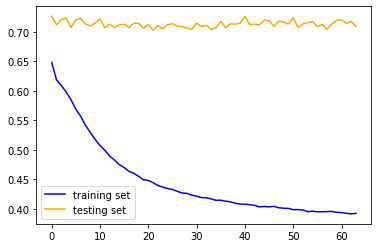

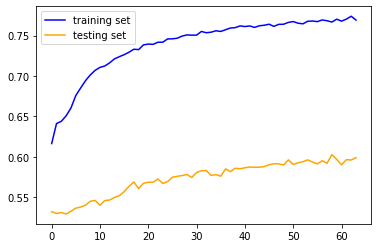

In [38]:
plt.plot(range(64), fourth_training.history["loss"], label="training set", color = "blue")
plt.plot(range(64), fourth_training.history["val_loss"], label="testing set", color = "orange")
plt.legend()
plt.show()

plt.plot(range(64), fourth_training.history["accuracy"],  label="training set", color = "blue")
plt.plot(range(64), fourth_training.history["val_accuracy"],  label="testing set", color = "orange")
plt.legend()
plt.show()

Running model on actual labelled data shows a significantly better performance than adding layers of pseudo-labelled data. We try to run the model on the actual labelled data with more sophisticated layers.

In [39]:
pure_model = Sequential([
    Dense(units=256, input_dim=x_train_data.shape[1], activation='sigmoid'),
    Dropout(0.2),
    Dense(units=256, activation='relu'),
    Dropout(0.2),
    Dense(units=64, activation='relu'),
    Dropout(0.2),
    Dense(units=1, activation='sigmoid')
])

pure_model.summary()

pure_model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

pure_training = pure_model.fit(x_train_data, y_train_data, batch_size=8, epochs=512, validation_data=(x_test_data, y_test_data))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               8960      
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               65792     
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 64)                16448     
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                

# Plotting of performance

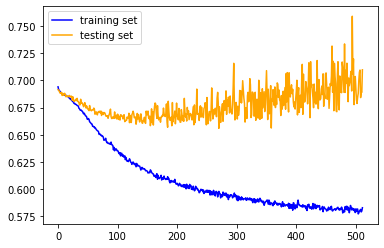

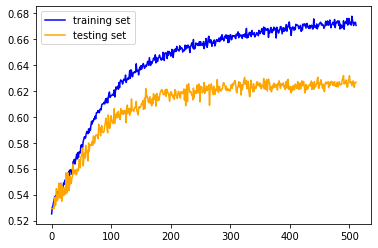

In [40]:
plt.plot(range(512), pure_training.history["loss"], label="training set", color = "blue")
plt.plot(range(512), pure_training.history["val_loss"], label="testing set", color = "orange")
plt.legend()
plt.show()

plt.plot(range(512), pure_training.history["accuracy"],  label="training set", color = "blue")
plt.plot(range(512), pure_training.history["val_accuracy"],  label="testing set", color = "orange")
plt.legend()
plt.show()